In [1]:
import requests
import pandas as pd

In [9]:
base_url = 'https://api.binance.com/api/v3/klines'
params = {
    'symbol': 'OGUSDT',
    'interval': '15m',
    'limit': 1000
} 

In [10]:
response = requests.get(base_url, params=params)
response = response.json()

In [18]:
df = pd.DataFrame(response)
#df = df.rename(columns={'0': 'Open Time', '1': 'Open Price', '2': 'High Price', '3': 'Low Price', '4': 'Close Price', 
#                        '5': 'Volume', '6': 'Close Time', '7': 'Quote Asset Volume', '8': 'Number of Trades',
 #                       '9': 'Total base asset purchased by takers', '10': 'Total quote asset sold by takers'})

df.columns = ['Open Time', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume', 'Close Time', 
              'Quote Asset Volume', 'Number of Trades', 'Total base asset purchased by takers', 'Total quote asset sold by takers', 'Ignore']

df = df.drop('Ignore', axis=1)

In [19]:
df.head()

,Open Time,Open Price,High Price,Low Price,Close Price,Volume,Close Time,Quote Asset Volume,Number of Trades,Total base asset purchased by takers,Total quote asset sold by takers
0,1728019800000,2.71800000,2.72400000,2.71700000,2.72200000,1972.50000000,1728020699999,5364.78150000,61,1021.50000000,2780.05890000
1,1728020700000,2.72200000,2.72600000,2.71600000,2.72400000,1317.50000000,1728021599999,3584.04560000,94,371.90000000,1012.55660000
2,1728021600000,2.72400000,2.72600000,2.70900000,2.71600000,2345.60000000,1728022499999,6368.33800000,161,1197.10000000,3249.19890000
3,1728022500000,2.71700000,2.72900000,2.71600000,2.72600000,1784.70000000,1728023399999,4861.93380000,65,488.20000000,1328.40490000
4,1728023400000,2.72800000,2.73100000,2.71700000,2.71800000,1143.70000000,1728024299999,3118.32560000,86,713.80000000,1948.40110000


In [20]:
import time

df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')

In [27]:
columns_not_to_convert = ['Open Time', 'Close Time']

for col in df.columns:
    if (col not in columns_not_to_convert) and (col != 'Number of Trades'):
        df[col] = df[col].astype('float32')
    elif col == 'Number of Trades':
        df[col] = df[col].astype('int32')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Open Time                             1000 non-null   datetime64[ns]
 1   Open Price                            1000 non-null   float32       
 2   High Price                            1000 non-null   float32       
 3   Low Price                             1000 non-null   float32       
 4   Close Price                           1000 non-null   float32       
 5   Volume                                1000 non-null   float32       
 6   Close Time                            1000 non-null   datetime64[ns]
 7   Quote Asset Volume                    1000 non-null   float32       
 8   Number of Trades                      1000 non-null   int32         
 9   Total base asset purchased by takers  1000 non-null   float32       
 10  T

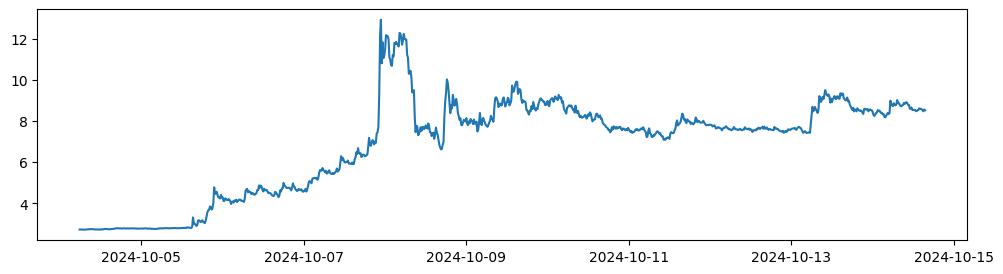

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(df['Close Time'], df['Close Price'])

In [35]:
df.to_csv('data/OGUSDT.csv')